In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [200]:
# Loading the data

leftTurn = pd.read_excel("leftturn_new.xlsx")
data = leftTurn.drop(["File_id","time_of_entering","time_of_exiting","precipitatingEvent","preIncidentManeuver", "maneuverJudgment", "incomplete_video", "vehicle_movement"], axis = 1)

In [201]:
# Cleaning the data

# Filling empty value in the questionary variable with zero
temp = data[['hear', 'heart', 'resp',
       'brain', 'vasc', 'nrvsandSlp', 'metab', 'limFlex', 'sevArthr', 'psych',
       'multMedConds', 'multMeds', 'dhiVisual', 'dhiFOV', 'clockDrawaing',
       'slpSched', 'slperTyp', 'nodOffWhlDrvng', 'qltyofSlp',
       'driverRestriction', 'numViol', 'numCrash', 'passTrnVeh', 'rage',
       'wrngWay', 'missLead', 'wrngLnInt']]
temp.fillna(0, inplace = True)
temp = temp.replace("(null)", 0)
data[['hear', 'heart', 'resp',
       'brain', 'vasc', 'nrvsandSlp', 'metab', 'limFlex', 'sevArthr', 'psych',
       'multMedConds', 'multMeds', 'dhiVisual', 'dhiFOV', 'clockDrawaing',
       'slpSched', 'slperTyp', 'nodOffWhlDrvng', 'qltyofSlp',
       'driverRestriction', 'numViol', 'numCrash', 'passTrnVeh', 'rage',
       'wrngWay', 'missLead', 'wrngLnInt']] = temp
# inputing Average value in the vehicle attributies
temp = data[['Avg_Acceleration',
       'std_Acceleration', 'Avg_speed', 'std_speed', 'max_speed',
       'max_acceleration', '6_Avg_Acceleration', '6_std_Acceleration',
       '6_Avg_speed', '6_std_speed', "age"]]

temp = temp.where(pd.notna(temp), temp.mean(), axis='columns')

data[['Avg_Acceleration',
       'std_Acceleration', 'Avg_speed', 'std_speed', 'max_speed',
       'max_acceleration', '6_Avg_Acceleration', '6_std_Acceleration',
       '6_Avg_speed', '6_std_speed', "age"]] = temp

data.crashStatus[data.crashStatus=='Near-Crash'] = 1 
data.crashStatus[data.crashStatus=='Balanced-Sample Baseline'] = 0 
data.crashStatus[(data.crashStatus!=0) & (data.crashStatus!=1)] = 2

# Filling Qualtrics Varible with 1
filledData = data.fillna(1)

/Users/raviagrawal/miniconda3/lib/python3.6/site-packages/pandas/core/frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
/Users/raviagrawal/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/raviagrawal/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/raviagrawal/miniconda3/lib/python3.6/site-packages/ipykernel_launch

In [188]:
# helper function to plot bar plot with error, labels and titles

def plotFunction(x, y,error, ylabel, title):
    y_pos = np.arange(len(x))
    plt.bar(y_pos, y, yerr=error, align='center', alpha=0.5)
    plt.xticks(y_pos, x)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()
    plt.close()

In [189]:
filledData.groupby(["turn_phase"])[['Avg_Acceleration', 'std_Acceleration', 'Avg_speed', 'std_speed',
       'max_speed', 'max_acceleration', '6_Avg_Acceleration',
       '6_std_Acceleration', '6_Avg_speed', '6_std_speed']].mean()

,Avg_Acceleration,std_Acceleration,Avg_speed,std_speed,max_speed,max_acceleration,6_Avg_Acceleration,6_std_Acceleration,6_Avg_speed,6_std_speed
turn_phase,,,,,,,,,,
1,0.002175,0.150952,6.338462,4.741034,16.000000,0.179800,0.011710,0.129517,4.526882,4.873601
2,0.053593,0.092874,19.156842,5.078607,28.513711,0.193006,0.048128,0.101185,18.715396,9.035957
3,0.062769,0.089760,24.157960,4.374532,31.062541,0.172544,0.060929,0.106342,20.421997,9.683144


In [190]:
# Selecting the data for the intersection type T and 4-way
# and ploting the mean and standard deviation of acceleration
intTypeMean = filledData[(filledData.intersection_type == 1.) | (filledData.intersection_type == 2.)].groupby(["intersection_type"])[['Avg_Acceleration']].mean()["Avg_Acceleration"]
intTypeStd = filledData[(filledData.intersection_type == 1.) | (filledData.intersection_type == 2.)].groupby(["intersection_type"])[['Avg_Acceleration']].std()["Avg_Acceleration"]

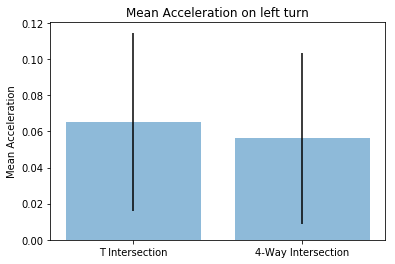

In [191]:
plotFunction(["T Intersection", "4-Way Intersection"], intTypeMean.tolist(), 
             intTypeStd.tolist(), "Mean Acceleration", "Mean Acceleration on left turn")

In [192]:
# Selecting the data for the intersection type T and 4-way
# and ploting the mean and standard deviation of speed

intTypeMean = filledData[(filledData.intersection_type == 1.) | (filledData.intersection_type == 2.)].groupby(["intersection_type"])[['Avg_speed']].mean()["Avg_speed"]
intTypeStd = filledData[(filledData.intersection_type == 1.) | (filledData.intersection_type == 2.)].groupby(["intersection_type"])[['Avg_speed']].std()["Avg_speed"] 

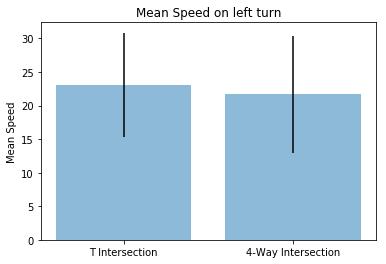

In [193]:
plotFunction(["T Intersection", "4-Way Intersection"], intTypeMean.tolist(), 
             intTypeStd.tolist(), "Mean Speed", "Mean Speed on left turn")

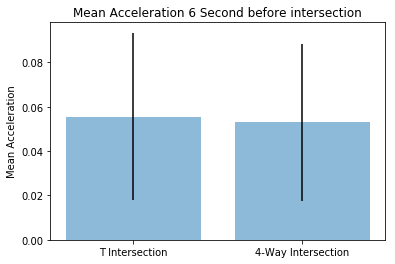

In [194]:
# Selecting the data for the intersection type T and 4-way
# and ploting the mean and mean acceleration 6 second before the intersection

intTypeMean = filledData[(filledData.intersection_type == 1.) | (filledData.intersection_type == 2.)].groupby(["intersection_type"])[['6_Avg_Acceleration']].mean()["6_Avg_Acceleration"]
intTypeStd = filledData[(filledData.intersection_type == 1.) | (filledData.intersection_type == 2.)].groupby(["intersection_type"])[['6_Avg_Acceleration']].std()["6_Avg_Acceleration"] 


plotFunction(["T Intersection", "4-Way Intersection"], intTypeMean.tolist(), 
             intTypeStd.tolist(), "Mean Acceleration", "Mean Acceleration 6 Second before intersection")



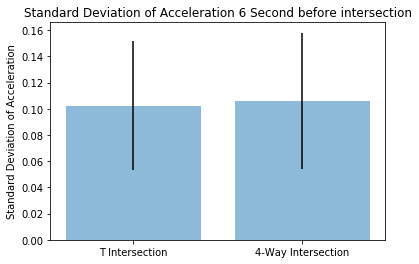

In [195]:
# Selecting the data for the intersection type T and 4-way
# and ploting the mean and standard deviation accleration 6 second before the intersection

intTypeMean = filledData[(filledData.intersection_type == 1.) | (filledData.intersection_type == 2.)].groupby(["intersection_type"])[['6_std_Acceleration']].mean()["6_std_Acceleration"]
intTypeStd = filledData[(filledData.intersection_type == 1.) | (filledData.intersection_type == 2.)].groupby(["intersection_type"])[['6_std_Acceleration']].std()["6_std_Acceleration"] 


plotFunction(["T Intersection", "4-Way Intersection"], intTypeMean.tolist(), 
             intTypeStd.tolist(), "Standard Deviation of Acceleration", "Standard Deviation of Acceleration 6 Second before intersection")




In [197]:
filledData.crashStatus.unique()

array([1, 0, 2])

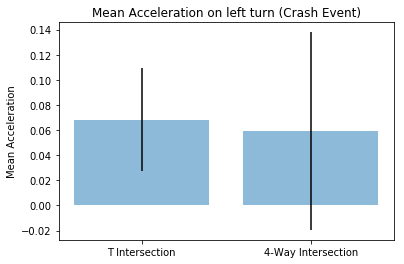

In [211]:
# All the above analysis for the crash
# Selecting the data for the intersection type T and 4-way
# and ploting the mean and standard deviation of acceleration

intTypeMean = filledData[((filledData.intersection_type == 1.) | (filledData.intersection_type == 2.)) & (filledData.crashStatus==2)].groupby(["intersection_type"])[['Avg_Acceleration']].mean()["Avg_Acceleration"]
intTypeStd = filledData[((filledData.intersection_type == 1.) | (filledData.intersection_type == 2.)) & (filledData.crashStatus==2)].groupby(["intersection_type"])[['Avg_Acceleration']].std()["Avg_Acceleration"]

plotFunction(["T Intersection", "4-Way Intersection"], intTypeMean.tolist(), 
             intTypeStd.tolist(), "Mean Acceleration", "Mean Acceleration on left turn (Crash Event)")

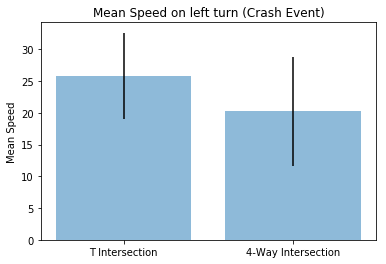

In [212]:
# Selecting the data for the intersection type T and 4-way for crash event
# and ploting the mean and standard deviation of speed

intTypeMean = filledData[((filledData.intersection_type == 1.) | (filledData.intersection_type == 2.)) & (filledData.crashStatus==2)].groupby(["intersection_type"])[['Avg_speed']].mean()["Avg_speed"]
intTypeStd = filledData[((filledData.intersection_type == 1.) | (filledData.intersection_type == 2.)) & (filledData.crashStatus==2)].groupby(["intersection_type"])[['Avg_speed']].std()["Avg_speed"] 

plotFunction(["T Intersection", "4-Way Intersection"], intTypeMean.tolist(), 
             intTypeStd.tolist(), "Mean Speed", "Mean Speed on left turn (Crash Event)")



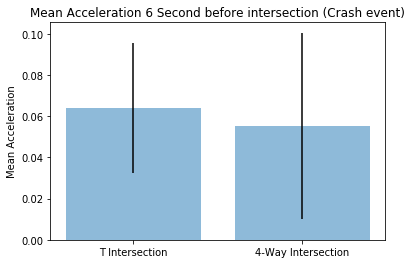

In [213]:
# Selecting the data for the intersection type T and 4-way for crash event
# and ploting the mean and mean acceleration 6 second before the intersection

intTypeMean = filledData[((filledData.intersection_type == 1.) | (filledData.intersection_type == 2.)) & (filledData.crashStatus==2)].groupby(["intersection_type"])[['6_Avg_Acceleration']].mean()["6_Avg_Acceleration"]
intTypeStd = filledData[((filledData.intersection_type == 1.) | (filledData.intersection_type == 2.)) & (filledData.crashStatus==2)].groupby(["intersection_type"])[['6_Avg_Acceleration']].std()["6_Avg_Acceleration"] 


plotFunction(["T Intersection", "4-Way Intersection"], intTypeMean.tolist(), 
             intTypeStd.tolist(), "Mean Acceleration", "Mean Acceleration 6 Second before intersection (Crash event)")




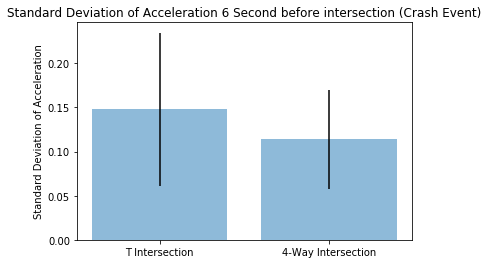

In [214]:
# Selecting the data for the intersection type T and 4-way
# and ploting the mean and standard deviation accleration 6 second before the intersection

intTypeMean = filledData[((filledData.intersection_type == 1.) | (filledData.intersection_type == 2.)) & (filledData.crashStatus==2)].groupby(["intersection_type"])[['6_std_Acceleration']].mean()["6_std_Acceleration"]
intTypeStd = filledData[((filledData.intersection_type == 1.) | (filledData.intersection_type == 2.)) & (filledData.crashStatus==2)].groupby(["intersection_type"])[['6_std_Acceleration']].std()["6_std_Acceleration"] 


plotFunction(["T Intersection", "4-Way Intersection"], intTypeMean.tolist(), 
             intTypeStd.tolist(), "Standard Deviation of Acceleration", "Standard Deviation of Acceleration 6 Second before intersection (Crash Event)")



